# Data Visualization

Looking for patterns in song features. Used PCA

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

## Getting our dataframe

If dataframe does not yet exist, run creating_tracks_numerical_features.py

In [18]:
tracks_features = pd.read_pickle('src/tracks_numerical_features.pkl')
print(tracks_features.shape)
tracks_features.head()

(1204025, 14)


,id,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,7lmeHLHBe4nmXzuXc0HDjk,0,0.470,0.978,7,-5.399,1,0.0727,0.02610,0.000011,0.3560,0.503,117.906,4.0
1,1wsRitfRRtWyEapl0q22o8,1,0.599,0.957,11,-5.764,1,0.1880,0.01290,0.000071,0.1550,0.489,103.680,4.0
2,1hR0fIFK2qRG3f3RF70pb7,0,0.315,0.970,7,-5.424,1,0.4830,0.02340,0.000002,0.1220,0.370,149.749,4.0
3,2lbASgTSoDO7MTuLAXlTW0,1,0.440,0.967,11,-5.830,0,0.2370,0.16300,0.000004,0.1210,0.574,96.752,4.0
4,1MQTmpYOZ6fcMQc56Hdo7T,0,0.426,0.929,2,-6.729,1,0.0701,0.00162,0.105000,0.0789,0.539,127.059,4.0


In [19]:
tracks_features = tracks_features.sample(frac=0.03, axis=0)
print(tracks_features.shape)

(36121, 14)


## Visualizing our data
1. Danceability
2. Energy
3. Acousticness
4. PCA

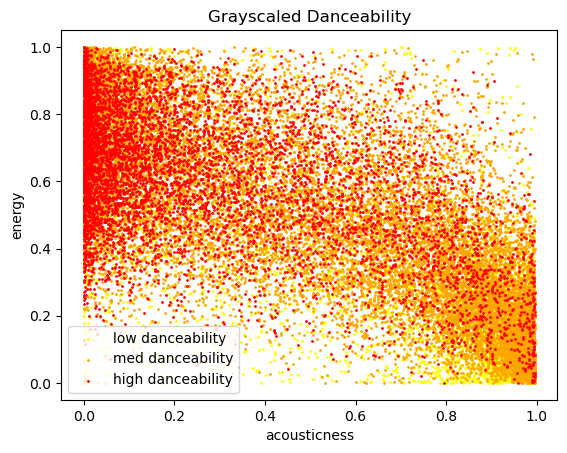

In [22]:
# Danceability scatter plot
low_danceability = tracks_features['danceability'][tracks_features['danceability'] <= 0.33]
low_tracks = tracks_features[tracks_features['danceability'] <= 0.33]
med_tracks = tracks_features[tracks_features['danceability'] <= 0.67]
med_tracks = med_tracks[med_tracks['danceability'] > 0.33]
med_danceability = tracks_features['danceability'][tracks_features['danceability'] <= 0.67]
med_danceability = med_danceability[med_danceability > 0.33]
high_danceability = tracks_features['danceability'][tracks_features['danceability'] > 0.67]
high_tracks = tracks_features[tracks_features['danceability'] > 0.67]
plt.scatter(low_tracks['acousticness'], low_tracks['energy'], color='yellow', s=1, label='low danceability')
plt.scatter(med_tracks['acousticness'], med_tracks['energy'], color='orange', s=1, label='med danceability')
plt.scatter(high_tracks['acousticness'], high_tracks['energy'], color='red', s=1, label='high danceability')
plt.legend()
plt.show
plt.xlabel('acousticness')
plt.ylabel('energy')
plt.title('Grayscaled Danceability')
plt.savefig('images/sampled_danceability_reds')
plt.show();

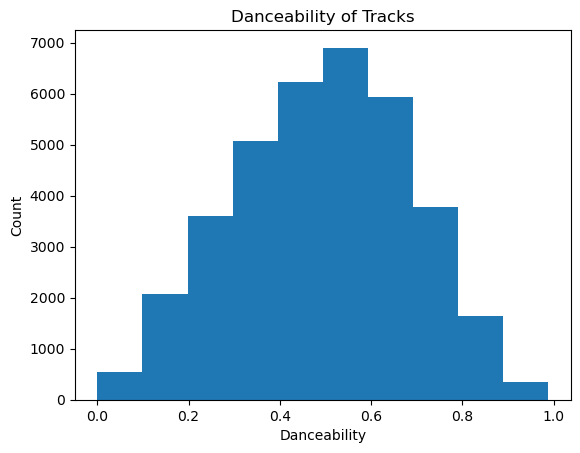

In [21]:
# Danceability histogram
plt.hist(tracks_features['danceability'])
plt.ylabel('Count')
plt.xlabel('Danceability')
plt.title('Danceability of Tracks')
plt.savefig('images/danceability_hist')
plt.show();

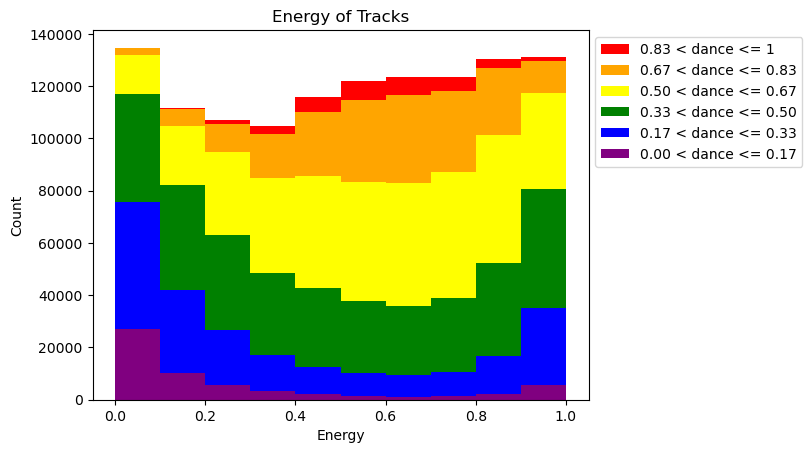

In [5]:
# Energy 
plt.hist(tracks_features[tracks_features['danceability']<=1]['energy'], color='red',label='0.83 < dance <= 1')
plt.hist(tracks_features[tracks_features['danceability']<.83]['energy'], color='orange',label='0.67 < dance <= 0.83')
plt.hist(tracks_features[tracks_features['danceability']<0.67]['energy'], color='yellow',label='0.50 < dance <= 0.67')
plt.hist(tracks_features[tracks_features['danceability']<0.5]['energy'], color='green',label='0.33 < dance <= 0.50')
plt.hist(tracks_features[tracks_features['danceability']<.33]['energy'], color='blue',label='0.17 < dance <= 0.33')
plt.hist(tracks_features[tracks_features['danceability']<.17]['energy'], color='purple',label='0.00 < dance <= 0.17')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.ylabel('Count')
plt.xlabel('Energy')
plt.title('Energy of Tracks')
plt.savefig('images/energy_colorbar')
plt.show();

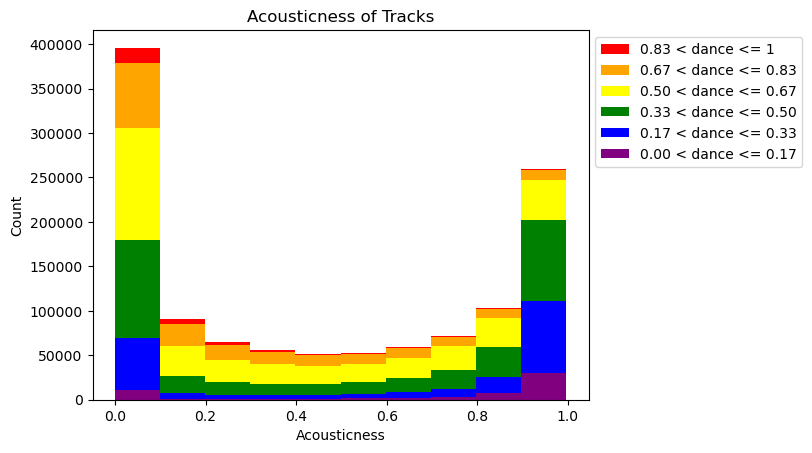

In [6]:
# Acousticness
plt.hist(tracks_features[tracks_features['danceability']<=1]['acousticness'], color='red',label='0.83 < dance <= 1')
plt.hist(tracks_features[tracks_features['danceability']<.83]['acousticness'], color='orange',label='0.67 < dance <= 0.83')
plt.hist(tracks_features[tracks_features['danceability']<0.67]['acousticness'], color='yellow',label='0.50 < dance <= 0.67')
plt.hist(tracks_features[tracks_features['danceability']<0.5]['acousticness'], color='green',label='0.33 < dance <= 0.50')
plt.hist(tracks_features[tracks_features['danceability']<.33]['acousticness'], color='blue',label='0.17 < dance <= 0.33')
plt.hist(tracks_features[tracks_features['danceability']<.17]['acousticness'], color='purple',label='0.00 < dance <= 0.17')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.ylabel('Count')
plt.xlabel('Acousticness')
plt.title('Acousticness of Tracks')
plt.savefig('images/acousticness_colorbar')
plt.show();

### Examining songs through PCA

explained variance ratio:  [0.28587501 0.24443377]
First PCA component: 
[-0.13641769 -0.49803368 -0.05270844 -0.16010792  0.12795382 -0.04371365
  0.66720108  0.4062914  -0.06844838 -0.2565596  -0.06316724 -0.04391786]
Second PCA component: 
[ 0.01410001 -0.0417633   0.1772984  -0.02427055 -0.96725969  0.00477977
  0.04209885  0.14971734 -0.01700394 -0.07590219 -0.01263489 -0.00464452]


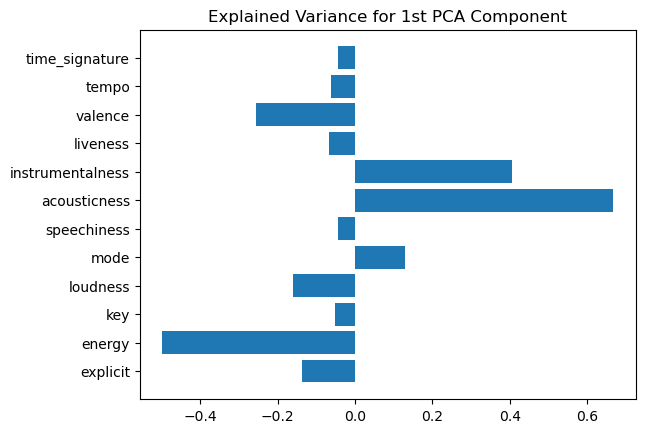

In [7]:
tracks_features = tracks_features.drop('id', axis=1, errors='ignore')
# PCA'ed features
def absmax_scale(series):
    return (series - min(series)) / (series.max() - series.min())
for col in tracks_features.columns:
    tracks_features[col] = absmax_scale(tracks_features[col])
    tracks_features[col] = np.round(tracks_features[col],4)

# rounding stuff
X = tracks_features.drop('danceability', axis=1).values
y = tracks_features['danceability'].values
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_new = pca.fit_transform(X)

print('explained variance ratio: ', pca.explained_variance_ratio_)
print('First PCA component: ')
print(pca.components_[0])
print('Second PCA component: ')
print(pca.components_[1])
plt.barh(list(tracks_features.drop('danceability', axis=1).columns), pca.components_[0])
plt.title('Explained Variance for 1st PCA Component')
plt.savefig('images/pca_component1')
plt.show();

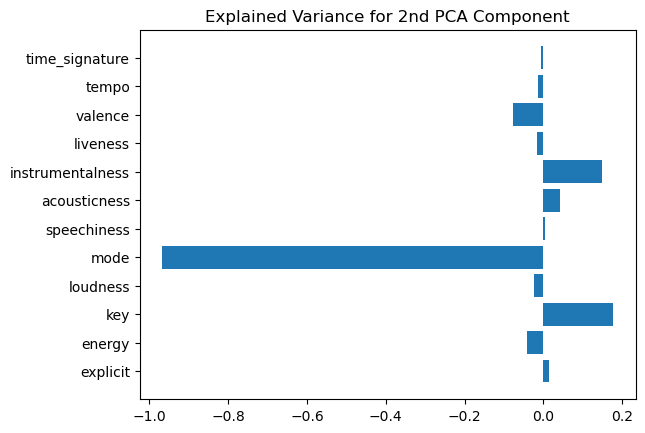

In [8]:
plt.barh(list(tracks_features.drop('danceability', axis=1).columns), pca.components_[1])
plt.title('Explained Variance for 2nd PCA Component')
plt.savefig('images/pca_component2')
plt.show();